In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import scripts.blosc_interface as bi
import scripts.corpus_split as cs

https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn
https://stackoverflow.com/questions/50756085/how-to-print-the-progress-of-a-list-comprehension-in-python
https://stackoverflow.com/questions/57983431/whats-the-most-space-efficient-way-to-compress-serialized-python-data

In [6]:
full_corpus = bi.blosc_read("./data/tokenized_corpus.dat")

In [4]:
full_corpus.head()

,art_title,art_author,art_date,art_topic,art_link,art_source,text,art_bias,stemmed_tokens,text_tokens,tokens,stems,text_lem
0,The emerging markets e-commerce opportunity,Christoph Ungerer,2021-03-26,future-development,https://www.brookings.edu/blog/future-developm...,Brookings Institute,while e-commerce giants such as amazon dominat...,left-wing,"[e-commerc, giant, amazon, domin, headlin, cov...","[e-commerce, giants, amazon, dominate, headlin...","e-commerce, giants, amazon, dominate, headline...","e-commerc, giant, amazon, domin, headlin, covi...","e-commerce, giants, amazon, dominate, headline..."
1,"""1619"" Pulitzer Will Boost Socialist Teaching ...",Mike Gonzalez,2020-05-11,education,https://www.heritage.org/education/commentary/...,Heritage Commentary,the pulitzer prize board this week awarded its...,right-wing,"[pulitz, prize, board, week, award, commentari...","[pulitzer, prize, board, week, awarded, commen...","pulitzer, prize, board, week, awarded, comment...","pulitz, prize, board, week, award, commentari,...","pulitzer, prize, board, week, awarded, comment..."
2,"""1983"" and ""The Brink"" Review: The Most Danger...","Lee Edwards, Ph.D.",2018-08-10,defense,https://www.heritage.org/defense/commentary/19...,Heritage Commentary,most historians agree that the world came clos...,right-wing,"[historian, agre, world, came, closest, nuclea...","[historians, agree, world, came, closest, nucl...","historians, agree, world, came, closest, nucle...","historian, agre, world, came, closest, nuclear...","historians, agree, world, came, closest, nucle..."
3,"""60 Minutes"" Snubs the Facts on Education",Jonathan Butcher,2018-03-13,education,https://www.heritage.org/education/commentary/...,Heritage Commentary,beth richardson is committed to her son’s succ...,right-wing,"[beth, richardson, commit, son, success, expec...","[beth, richardson, committed, son, success, ex...","beth, richardson, committed, son, success, exp...","beth, richardson, commit, son, success, expect...","beth, richardson, committed, son, success, exp..."
4,"""As Israel and the Arabs Battle, Moscow Collec...",James Phillips,1983-09-20,europe,https://www.heritage.org/europe/report/israel-...,Heritage Report,"i i 291 september 20, 1983 as israel and the a...",right-wing,"[septemb, israel, arab, ban4, moscow, collect,...","[september, israel, arabs, ban4, moscow, colle...","september, israel, arabs, ban4, moscow, collec...","septemb, israel, arab, ban4, moscow, collect, ...","september, israel, arabs, ban4, moscow, collec..."


In [7]:
x_train, x_test, y_train, y_test = cs.corpus_split(full_corpus)

In [2]:
log_reg_cv_results = bi.blosc_read("./data/log_grid_search_result.dat")

In [4]:
log_reg_cv_results.query("rank_test_score <= 5")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__ngram_range,param_vect__max_features,param_svd__n_components,param_log_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,64.123026,3.714061,6.076129,1.974486,"(1, 2)",400,30,10000.0,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.848319,0.839127,0.827636,0.837690,0.850043,0.840563,0.008093,5
14,58.169902,0.920133,4.012292,0.195800,"(1, 2)",400,60,21.544347,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.867567,0.857512,0.852054,0.846883,0.873600,0.859523,0.009823,1
18,12.827075,0.430348,2.242276,0.205860,"(1, 1)",400,60,21.544347,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",0.863832,0.851767,0.846309,0.844872,0.865843,0.854525,0.008752,3
35,11.156855,0.467028,2.069154,0.159691,"(1, 1)",300,45,10000.0,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",0.852054,0.844585,0.839989,0.833668,0.859523,0.845964,0.009052,4
38,12.062435,0.280006,2.068953,0.173405,"(1, 1)",400,60,10000.0,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",0.864694,0.854352,0.850618,0.846596,0.867280,0.856708,0.008005,2


In [11]:
log_clf = Pipeline([
            ('vect', CountVectorizer(max_features=400, ngram_range=(1,2))),
            ('tfidf', TfidfTransformer()),
            ("svd", TruncatedSVD(n_components=60)),
            ('log_clf', LogisticRegression(penalty="l1", solver = 'saga', C=21.544347, max_iter=1000)), # this needs to be a different solver for LASSO
        ])



In [12]:
log_clf.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(max_features=400, ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('svd', TruncatedSVD(n_components=60)),
                ('log_clf',
                 LogisticRegression(C=21.544347, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [13]:
predicted = log_clf.predict(x_test)
np.mean(predicted == y_test)

print(metrics.classification_report(y_test, predicted))

metrics.confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

   left-wing       0.87      0.84      0.85      2097
  right-wing       0.86      0.88      0.87      2255

    accuracy                           0.86      4352
   macro avg       0.86      0.86      0.86      4352
weighted avg       0.86      0.86      0.86      4352



array([[1762,  335],
       [ 269, 1986]])

In [36]:
log_clf[2].n_features_in_

400

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py

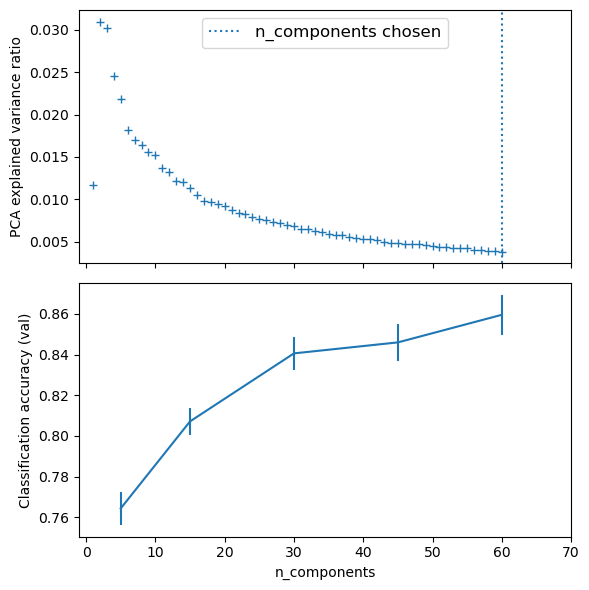

In [32]:
# Taken from Sklearn's Auto Examples
# Plot the Truncated SVD spectrum
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, log_clf[2].n_components + 1), log_clf[2].explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    log_clf[2].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = log_reg_cv_results
components_col = "param_svd__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()
